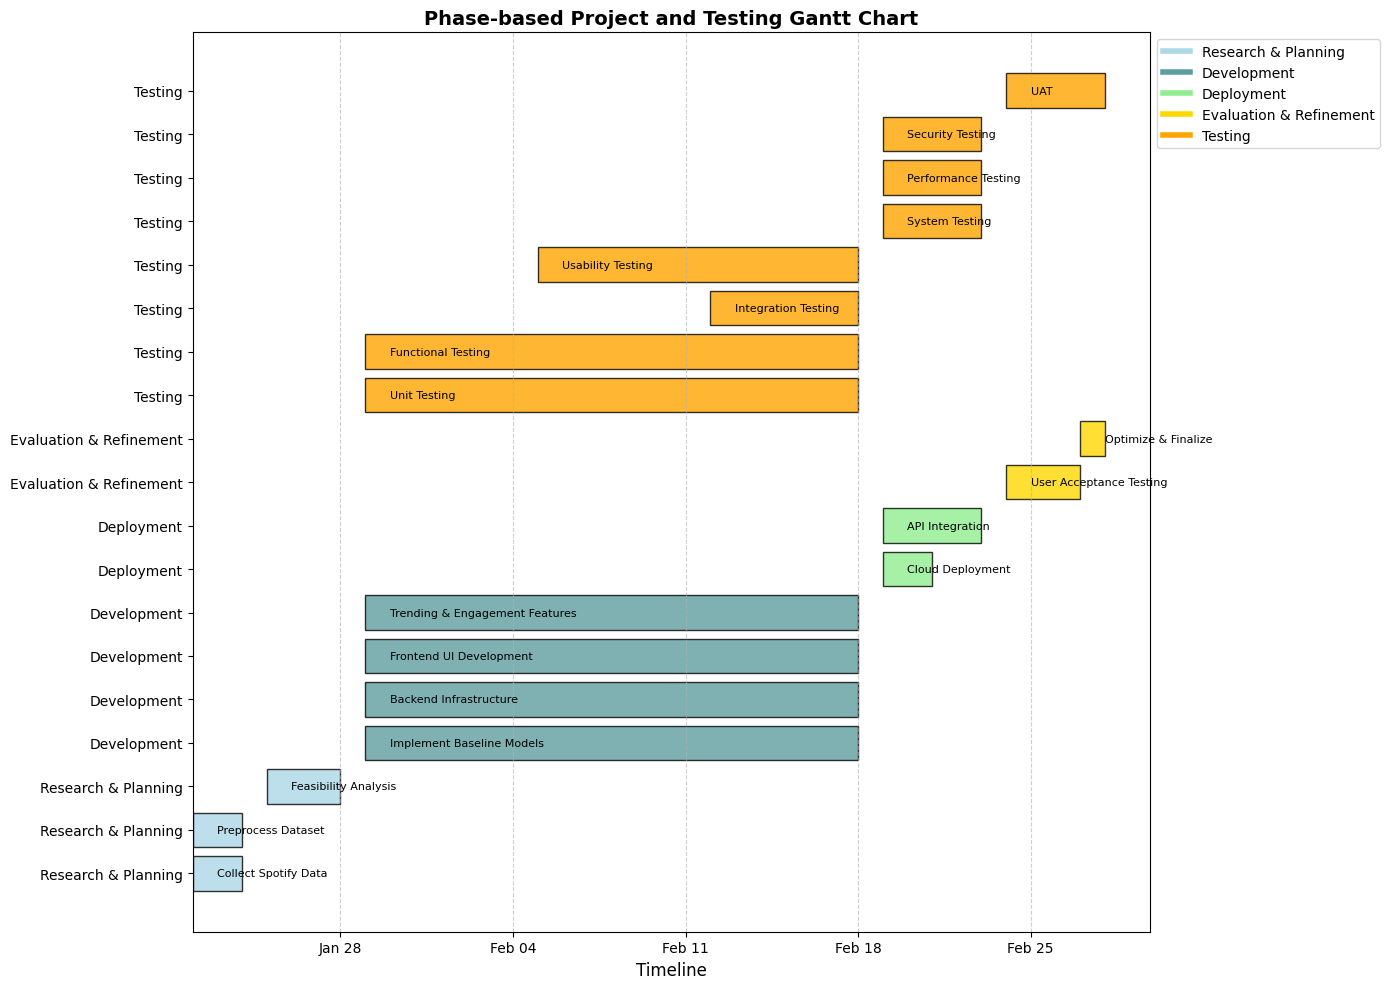

In [14]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define tasks with aligned development tasks and separate testing tasks
tasks = [
    # Project activities
    {"Phase": "Research & Planning", "Task": "Collect Spotify Data", "Start": "2025-01-22", "End": "2025-01-24"},
    {"Phase": "Research & Planning", "Task": "Preprocess Dataset", "Start": "2025-01-22", "End": "2025-01-24"},
    {"Phase": "Research & Planning", "Task": "Feasibility Analysis", "Start": "2025-01-25", "End": "2025-01-28"},
    {"Phase": "Development", "Task": "Implement Baseline Models", "Start": "2025-01-29", "End": "2025-02-18"},
    {"Phase": "Development", "Task": "Backend Infrastructure", "Start": "2025-01-29", "End": "2025-02-18"},
    {"Phase": "Development", "Task": "Frontend UI Development", "Start": "2025-01-29", "End": "2025-02-18"},
    {"Phase": "Development", "Task": "Trending & Engagement Features", "Start": "2025-01-29", "End": "2025-02-18"},
    {"Phase": "Deployment", "Task": "Cloud Deployment", "Start": "2025-02-19", "End": "2025-02-21"},
    {"Phase": "Deployment", "Task": "API Integration", "Start": "2025-02-19", "End": "2025-02-23"},
    {"Phase": "Evaluation & Refinement", "Task": "User Acceptance Testing", "Start": "2025-02-24", "End": "2025-02-27"},
    {"Phase": "Evaluation & Refinement", "Task": "Optimize & Finalize", "Start": "2025-02-27", "End": "2025-02-29"},

    # Testing activities (separate group)
    {"Phase": "Testing", "Task": "Unit Testing", "Start": "2025-01-29", "End": "2025-02-18"},
    {"Phase": "Testing", "Task": "Functional Testing", "Start": "2025-01-29", "End": "2025-02-18"},
    {"Phase": "Testing", "Task": "Integration Testing", "Start": "2025-02-12", "End": "2025-02-18"},
    {"Phase": "Testing", "Task": "Usability Testing", "Start": "2025-02-05", "End": "2025-02-18"},
    {"Phase": "Testing", "Task": "System Testing", "Start": "2025-02-19", "End": "2025-02-23"},
    {"Phase": "Testing", "Task": "Performance Testing", "Start": "2025-02-19", "End": "2025-02-23"},
    {"Phase": "Testing", "Task": "Security Testing", "Start": "2025-02-19", "End": "2025-02-23"},
    {"Phase": "Testing", "Task": "UAT", "Start": "2025-02-24", "End": "2025-02-29"},
]

# Convert dates
for task in tasks:
    task["Start"] = datetime.strptime(task["Start"], "%Y-%m-%d")
    try:
        task["End"] = datetime.strptime(task["End"], "%Y-%m-%d")
    except ValueError:
        # If the date is invalid (like Feb 29 in a non-leap year),
        # adjust it to the last day of the month
        if task["End"].endswith("-02-29") and not (int(task["End"][:4]) % 4 == 0 and (int(task["End"][:4]) % 100 != 0 or int(task["End"][:4]) % 400 == 0)):  # Check for Feb 29 and non-leap year
            task["End"] = task["End"][:4] + "-02-28"  # Change to Feb 28
        task["End"] = datetime.strptime(task["End"], "%Y-%m-%d") # Convert the adjusted date

# Assign colors to each phase
phase_colors = {
    "Research & Planning": "lightblue",
    "Development": "cadetblue",
    "Deployment": "lightgreen",
    "Evaluation & Refinement": "gold",
    "Testing": "orange",
}

# Separate tasks into two groups: Project activities and Testing
project_tasks = [task for task in tasks if task["Phase"] != "Testing"]
testing_tasks = [task for task in tasks if task["Phase"] == "Testing"]

# Assign positions
all_tasks = project_tasks + testing_tasks
y_positions = {task["Task"]: i for i, task in enumerate(all_tasks)}

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(14, 10))

# Plot tasks
for task in all_tasks:
    y = y_positions[task["Task"]]
    color = phase_colors[task["Phase"]]  # Use phase color
    ax.barh(y, (task["End"] - task["Start"]).days, left=task["Start"], color=color, edgecolor="black", alpha=0.8)
    ax.text(task["Start"] + timedelta(days=1), y, task["Task"], va="center", ha="left", fontsize=8)

# Configure chart
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.set_yticks(range(len(all_tasks)))
ax.set_yticklabels([task["Phase"] for task in all_tasks])
ax.set_xlabel("Timeline", fontsize=12)
ax.set_title("Phase-based Project and Testing Gantt Chart", fontsize=14, weight="bold")
ax.grid(axis="x", linestyle="--", alpha=0.6)

# Add legend for phases
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in phase_colors.values()]
ax.legend(legend_labels, phase_colors.keys(), loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()
